## Sentiment Analysis of Apple and Google Products Using NLP on Twitter Data

![header](Images/GvsA.jpg)

Final Project Submission:

Student names: 

- Annah Mukethe
- Collins Ouko
- Camilla Lumwaji
- Eric Rono
- Edwin Mbuthia
- Gladys Kemunto
- Petra Kibugu

Student pace: Part Time

Scheduled project review date/time: Phase 4

Instructor name: Samuel Karu

Group 4 git url: [Sentiment Project GitHub Repository](https://github.com/Mosota-Kemunto-Gladys-2020/Sentiment_project.git)



### Project Overview

This project aims **to develop a Natural Language Processing (NLP) model to analyze sentiment in Tweets related to Apple and Google products**. **The goal is to classify these Tweets as **positive, negative, or neutral**, providing valuable insights into public perception. This data will assist businesses in refining marketing strategies and improving product development.

### Business Problem

In today's social media-driven world, brands must monitor customer sentiments in real time. Twitter has become a prominent platform for expressing opinions about products and brands. The rapid pace and vast number of tweets make it impossible to manually analyze all opinions. Therefore, a Natural Language Processing (NLP) model is needed to automatically classify the sentiment of tweets and identify the target brand or product.

The dataset from CrowdFlower includes over 9,000 tweets tagged with sentiment (positive, negative, or neutral) and associated brands or products. **The project aims to build an NLP model that can:**

1. **Classify Sentiments**: Determine if a tweet expresses positive, negative, or neutral sentiment.
2. **Identify Brand/Product**: Recognize which brand or product is being referred to in the tweet.
3. **Handle Ambiguity**: Manage tweets that reference multiple brands or express unclear sentiments.

Key challenges include handling informal language, understanding subtle sentiment expressions, and building a real-time scalable solution to process large amounts of data efficiently.

### Project Objectives

1. **Binary Classification Model**: 
   - First, develop a binary classification model that classifies tweets as either positive or negative. Using Logistic Regression and other models, the goal is to achieve 85% accuracy as a proof of concept.

2. **Multiclass Classification**: 
   - Expand the binary classifier to include neutral sentiments, creating a multiclass classifier using various models such as XGBoost and Multinomial Naive Bayes, with a target accuracy of 70%.

3. **Sentiment Comparison Across Brands**: 
   - Compare sentiment distributions between Apple and Google products to provide insights for refining marketing and product strategies.

#### Stakeholders

1. **Product Managers** at Apple and Google to adjust product features based on consumer sentiment.
2. **Marketing Teams** to evaluate the effectiveness of campaigns and brand perception.
3. **Customer Support Teams** to address negative sentiment and leverage positive feedback.
4. **Consultants and Market Analysts** to provide data-driven advice on consumer perceptions.

#### Methodology Overview

1. **Data Understanding**:
   - Analyze the dataset, which includes columns such as `tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`.
   - Address any anomalies like missing values and duplicates.

2. **Data Preparation**:
   - Remove duplicate entries.
   - Populate missing values in the `emotion_in_tweet_is_directed_at` column with "none."
   - Apply text preprocessing techniques: tokenization, lowercasing, stopword removal, and lemmatization.

3. **Modeling**:
   - Utilize libraries like NLTK (for tokenization, stopword removal, lemmatization), sklearn's CountVectorizer (for vectorization), and pandas (for data handling).
   - Build a logistic regression model for binary classification (positive/negative sentiment), aiming for 70% accuracy.
   - Expand the model to a multiclass classifier to include neutral sentiments.

4. **Evaluation**:
   - Use accuracy as the primary evaluation metric, assessing the model’s ability to classify sentiments correctly.
   - Address potential limitations such as missing values and data quality issues.


### **1 Data Understanding**

We are using a dataset sourced from **CrowdFlower via Data.world,** containing approximately 9,000 tweets expressing sentiments about Apple and Google products. This dataset includes columns such as `tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`. The main objective is to accurately classify each tweet into one of three sentiment categories: positive, negative, or neutral.

 1.1 Import Necessary Libraries

In [1]:
# Standard Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# NLTK for Natural Language Processing
import nltk
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import re

# Download necessary NLTK data
nltk.download('punkt')

# Scikit-learn for Machine Learning Models and Preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Scikit-learn Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# TensorFlow/Keras for Deep Learning Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Imbalanced-learn for Handling Imbalanced Datasets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# XGBoost for Gradient Boosting
from xgboost import XGBClassifier

# Progress Bar for Iterations
from tqdm import tqdm

# Optional Import for LightGBM (commented out)
# from lightgbm import LGBMClassifier

# Random library for random sampling
import random


[nltk_data] Downloading package punkt to c:\Users\Augustine
[nltk_data]     Wanyonyi\anaconda3\envs\learn-env\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1.2 Load Data

In [2]:
#load the dataset
df = pd.read_csv('Data\Sentiments_analysis.csv', encoding = 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


1.3 Data Exploration 

In [3]:
#looking at data, duplicates and null valuesprint
def data_summary(df):
    # Print the DataFrame info
    print(df.info())
    print(("-" * 20))
    
    # Print the total number of duplicated rows
    print('Total duplicated rows')
    print(df.duplicated().sum())
    print(("-" * 20))
    # Print the total number of null values in each column
    print('Total null values')
    
    print(df.isna().sum())    
data_summary(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


<small>
Data Analysis Summary

The dataset contains **9,093 rows and 3 columns**, with **tweet_text missing 1 value and emotion_in_tweet_is_directed_at missing 5,802 values**. There are **22 duplicated rows**, and **the column is_there_an_emotion_directed_at_a_brand_or_product has no missing values.**
<small>

1.4  Sentiment Breakdown and Visualization

In [4]:
#Sentiment Breakdown and Visualization
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts() 

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

<Axes: xlabel='is_there_an_emotion_directed_at_a_brand_or_product', ylabel='count'>

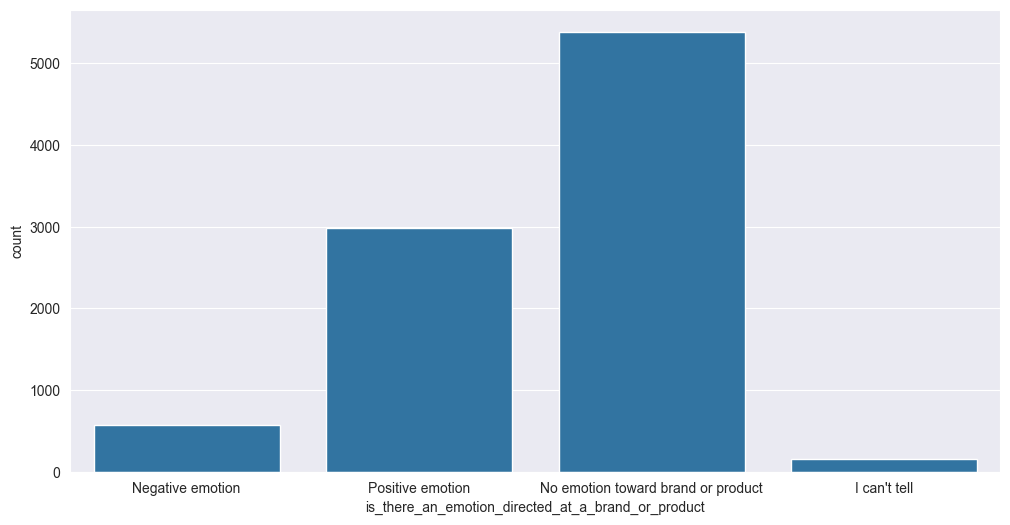

In [5]:
# Plot the sentiment breakdown for 'is_there_an_emotion_directed_at_a_brand_or_product'
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)

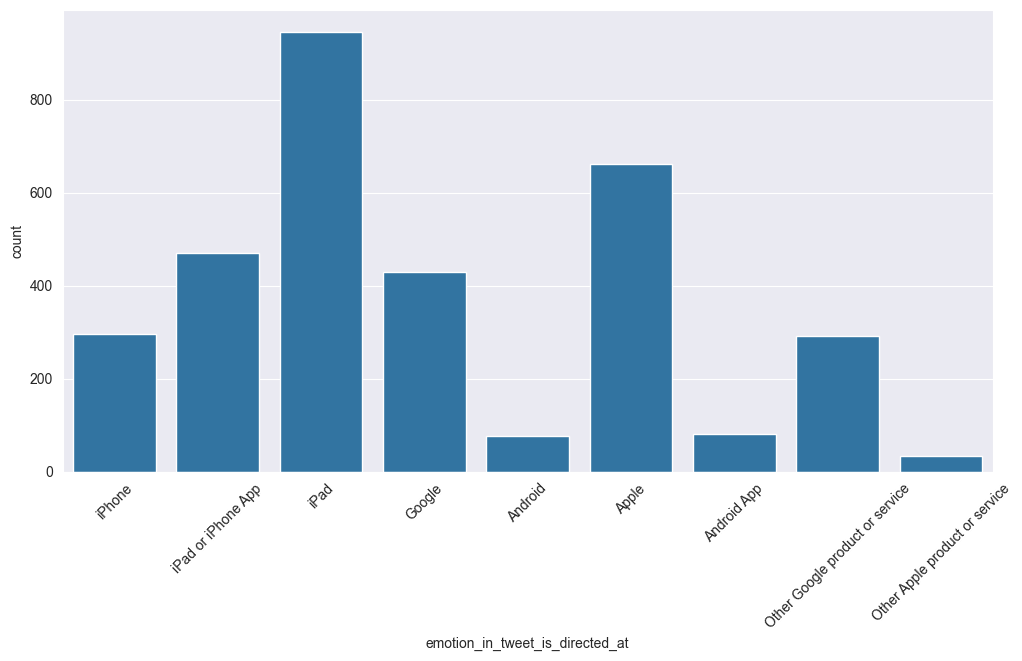

In [6]:
# Plot the sentiment breakdown for 'emotion_in_tweet_is_directed_at'

fig =  plt.figure(figsize=(12,6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df)
plt.xticks(rotation=45);

<small>
Summary of Sentiment Breakdown:

The bar chart reveals that **iPad** is the most frequently mentioned product in the tweets, followed by other **Apple products** (iPad, iPhone, and Apple) and **Google products**. **Android-related products** receive fewer mentions, highlighting the dominance of Apple products in user-directed sentiments.
<small>.

1.5  Renaming long column names

We renamed  the column ```emotion_in_tweet_is_directed_at``` to ```product_brand``` and the column ```is_there_an_emotion_directed_at_a_brand_or_product``` to ```sentiment``` to enhance clarity and facilitate their usage in our subsequent computation

In [7]:
# Renaming the columns
data_renamed = df.rename(columns={
    'emotion_in_tweet_is_directed_at':'product_brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

# Display the updated columns
print(data_renamed.columns)

Index(['tweet_text', 'product_brand', 'sentiment'], dtype='object')


In [8]:
# Displaying the first few rows of the DataFrame
data_renamed.head()

,tweet_text,product_brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


1.6  Imputing Missing Values in the Dataset

In [9]:
# Using SimpleImputer to fill missing values with a constant strategy

imputer_mode = SimpleImputer(strategy='constant')
data_renamed = pd.DataFrame(imputer_mode.fit_transform(data_renamed), columns=data_renamed.columns)
data_renamed.isna().sum()

tweet_text       0
product_brand    0
sentiment        0
dtype: int64

In [10]:
data_renamed.head()

,tweet_text,product_brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


1.7  Handling and Identifying Duplicates in the Dataset

In [11]:

# Identify duplicates
duplicates = data_renamed[data_renamed.duplicated()]
# Display the 22 duplicates, if available
duplicates.head()

,tweet_text,product_brand,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,missing_value,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,missing_value,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion


In [12]:
# handling the duplicates 

data_renamed.drop_duplicates(subset=None, keep="first", inplace=True)


In [13]:
data_renamed.shape

(9071, 3)

1.8 Mapping Product_brand to brand_item

In [14]:
# Create a working dataframe with easier column name
df = data_renamed.copy(deep=True)
df.dropna(subset=['tweet_text'], inplace=True)

# Convert the data types to string
df['tweet_text'] = df['tweet_text'].astype(str)
df['brand_item'] = df['product_brand'].astype(str)

# Brand name mapping
brand = {'iPhone': 'apple',
         'iPad or iPhone App':'apple',
         'iPad': 'apple',
         'Google': 'google',
         'nan': 'UNK',
         'Android':'google',
         'Apple': 'apple',
         'Android App':'google',
         'Other Google product or service':'google',
         'Other Apple product or service':'apple'
        }

df['product_brand'] = df['product_brand'].map(brand)

# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral',
                 "I can't tell":'neutral'}

df['sentiment'] = df['sentiment'].map(label_encoder)
df = df[df['sentiment'] != 'confused']    # drop the rows containing 'confused' labels

1.9 Sentiment Visualization

In [15]:
df.sentiment.value_counts(normalize=True)

sentiment
neutral     0.609856
positive    0.327417
negative    0.062727
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Brand Item Distribution')

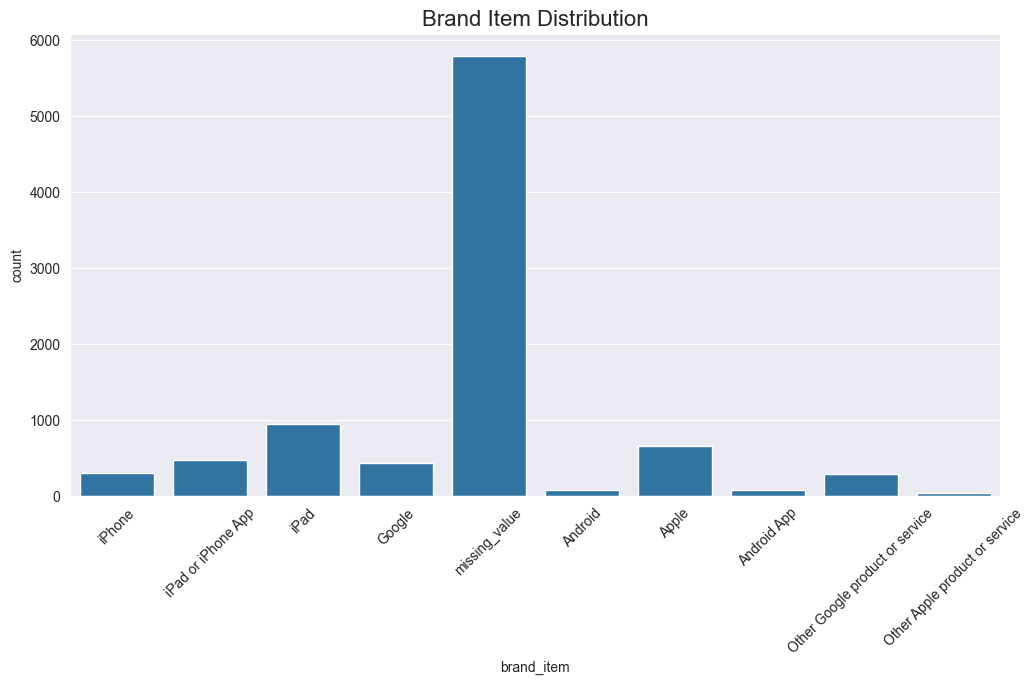

In [16]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='brand_item', data=df)
plt.xticks(rotation=45);
plt.title('Brand Item Distribution', fontsize=16)

<small>

- **iPad** and **Apple** products have a noticeable presence, indicating that they are frequently mentioned in the dataset.
- **Google** and **Android** have fewer mentions compared to Apple-related products.
- Other product categories, such as **iPhone**, **iPad or iPhone App**, **Android App**, and **Other Google or Apple products or services**, have minimal representation.

In our next visualization, we will focus on comparing **Apple** and **Google** products after mapping product brands to the **brand_item** variable. This will help us further analyze the sentiment and mentions between these two major brands.

<small>


Text(0.5, 1.0, 'Sentiment Comparison Between Apple and Google')

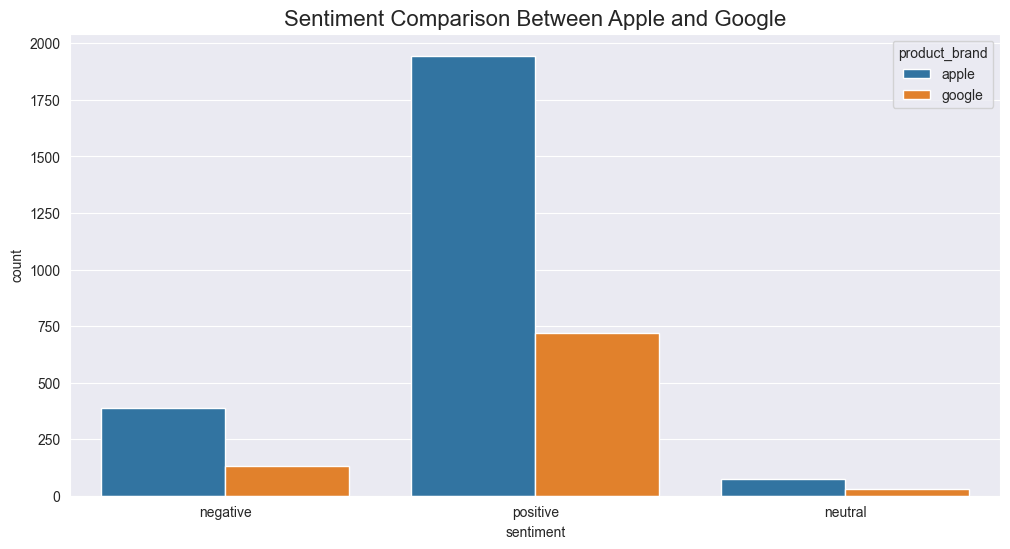

In [17]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'sentiment', hue='product_brand')
# Adding a title to the plot
plt.title('Sentiment Comparison Between Apple and Google', fontsize=16)

<small>
Sentiment Comparison Between Apple and Google:

The bar chart compares the sentiment distribution between **Apple** and **Google** products. For **positive sentiment**, Apple has a significantly higher count compared to Google, indicating a strong positive reaction toward Apple products. **Negative sentiment** is more balanced but still higher for Apple than Google. Both brands have very low counts in the **neutral sentiment** category, with Apple showing slightly more mentions than Google. This comparison suggests that Apple products generate more engagement, particularly in positive sentiment, than Google products.
<small>


### **2 Text Processing**

<small>
In this step, we will clean and prepare the `tweet_text` column by performing the following actions:

- **Removing URLs, Mentions, and Hashtags**: Eliminated URLs, Twitter mentions (e.g., @username), and hashtags (e.g., #topic) to reduce noise.
- **Removing Special Characters, Digits, and Extra Spaces**: Cleansed the text by removing non-alphabetical characters, digits, and unnecessary spaces.
- **Converting Text to Lowercase**: Standardized the text by converting all characters to lowercase.
- **Tokenizing and Removing Stopwords**: Split the text into individual tokens (words) and removed common stopwords (e.g., "the", "and") to focus on meaningful content.
<small>

2.1 Text Cleaning and Data Overview

In [18]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters, digits, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Display the first few cleaned tweets
print("\nFirst few cleaned tweet texts:")
print(df['cleaned_text'].head())


# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)


First few cleaned tweet texts:
0    i have a g iphone after hrs tweeting at it was...
1    know about awesome ipadiphone app that youll l...
2    can not wait for also they should sale them do...
3    i hope this years festival isnt as crashy as t...
4    great stuff on fri marissa mayer google tim or...
Name: cleaned_text, dtype: object

Dataframe shape: (9071, 5)


2.2 Advanced Text Preprocessing with Lemmatization and Stopword Removal

In [19]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def advanced_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    
    return ' '.join(cleaned_tokens), tokens
# Apply advanced preprocessing to the 'cleaned_text' column and store both results
df['preprocessed_text'], df['tokenized_text'] = zip(*df['cleaned_text'].apply(advanced_preprocess))

# Display the first few rows including the new tokenized text column
print(df[['tweet_text', 'cleaned_text', 'preprocessed_text', 'tokenized_text']].head())

# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)

print(df.describe())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  \
0  i have a g iphone after hrs tweeting at it was...   
1  know about awesome ipadiphone app that youll l...   
2  can not wait for also they should sale them do...   
3  i hope this years festival isnt as crashy as t...   
4  great stuff on fri marissa mayer google tim or...   

                                   preprocessed_text  \
0  g iphone hr tweeting dead need upgrade plugin ...   
1  know awesome ipadiphone app youll likely appre...   
2                                     wait also sale   
3     hope year festival isnt crashy year iphone app   
4  great stuff fri marissa mayer google tim or

In [20]:
df.head()# Displaying the First Few Rows of the cleaned Dataset

,tweet_text,product_brand,sentiment,brand_item,cleaned_text,preprocessed_text,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,iPhone,i have a g iphone after hrs tweeting at it was...,g iphone hr tweeting dead need upgrade plugin ...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...,know awesome ipadiphone app youll likely appre...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,iPad,can not wait for also they should sale them do...,wait also sale,"[can, not, wait, for, also, they, should, sale..."
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,Google,great stuff on fri marissa mayer google tim or...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, on, fri, marissa, mayer, google..."


2.3 Generate Word Cloud for Positive,Negative and Neutral Sentiment Tweets

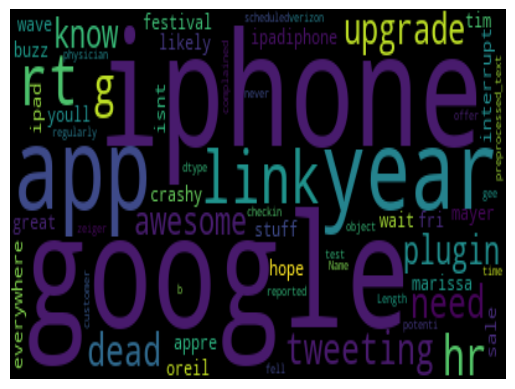

In [21]:
from wordcloud import WordCloud
def create_wordcloud(df, col):
    wordcloud = WordCloud(background_color='black').generate(str(col))
    plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
    plt.axis("off")
    plt.show() 
create_wordcloud(df.loc[df['sentiment']=='negative'], df['preprocessed_text'])

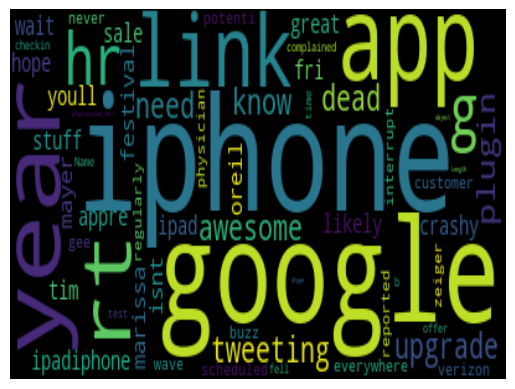

In [22]:
create_wordcloud(df.loc[df['sentiment']=='positive'], df['preprocessed_text'])

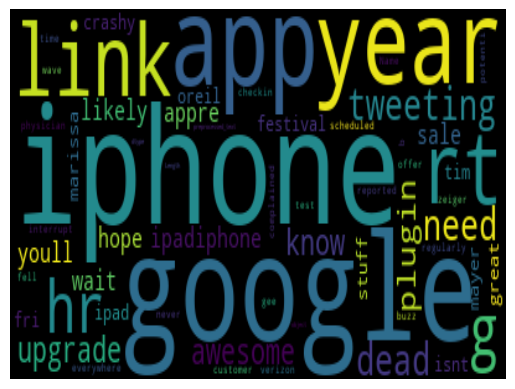

In [23]:
create_wordcloud(df.loc[df['sentiment']=='neutral'], df['preprocessed_text'])

### **3 Modeling**

<small>
In this section, we will build and evaluate various machine learning models to classify sentiments in the dataset. The goal is to determine the most effective model for both binary classification (positive/negative) and multi-class classification (positive/negative/neutral).
<small>

3.1 Preparing Data for Binary or Multi-class Classification 
<small>

We begin by preparing the data for modeling. Depending on the task, we either restrict the dataset to only positive and negative sentiments for binary classification or include neutral sentiments for multi-class classification. We also encode the target sentiment labels into numerical values and prepare the features, including the processed text and product brand.
<small>

In [24]:
# Function to prepare data for binary or multi-class classification
def prepare_data(df, binary=True):
    if binary:
        # Keep only positive and negative sentiments for binary classification
        df = df[df['sentiment'].isin(['positive', 'negative'])].copy()  # Create a copy to avoid the warning
    else:
        # Include all sentiments for multi-class classification
        df = df[df['sentiment'].isin(['positive', 'negative', 'neutral'])].copy()  # Copy for safety
    
    # Encode the target variable
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['sentiment'])  # Modify copy of DataFrame
    
    # Prepare features (X) and target (y)
    X = df[['preprocessed_text', 'product_brand']]
    y = df['sentiment_encoded']
    
    return X, y, le


In [25]:
df.head()# Displaying the First Few Rows of the Dataset

,tweet_text,product_brand,sentiment,brand_item,cleaned_text,preprocessed_text,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,iPhone,i have a g iphone after hrs tweeting at it was...,g iphone hr tweeting dead need upgrade plugin ...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...,know awesome ipadiphone app youll likely appre...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,iPad,can not wait for also they should sale them do...,wait also sale,"[can, not, wait, for, also, they, should, sale..."
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,Google,great stuff on fri marissa mayer google tim or...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, on, fri, marissa, mayer, google..."


3.2 Vectorization using Tfi-df

<small>
The textual data is transformed into numerical form using TfidfVectorizer, which converts the preprocessed_text into a matrix of TF-IDF features. The categorical variable product_brand is also encoded using OneHotEncoder to incorporate brand information into the model. A ColumnTransformer is used to apply these transformations to the respective features
<small>

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', TfidfVectorizer(max_features=5000), 'preprocessed_text'),
        ('product_onehot', OneHotEncoder(drop='first', sparse_output=False), ['product_brand'])
    ])

3.3 Pipelines(Binary Classification )

<small>
To streamline the process of preprocessing and model training, we define several pipelines for different machine learning algorithms. These pipelines include:

- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**
- **Gradient Boosting**
- **Neural Networks (MLPClassifier)**
- **XGBoost**
<small>

In [27]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', SVC(kernel='rbf', random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    'Neural Network': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', XGBClassifier(n_estimators=100, random_state=42))
    ])
    # 'LightGBM': Pipeline([
    #     ('preprocessor', preprocessor),
    #     ('clf', LGBMClassifier(n_estimators=100, random_state=42))
    # ])
}

### **4  Training and Evaluation of models**

4.1  Train and Evaluation of Models

In [28]:
# Function to train and evaluate models
def train_and_evaluate(X, y, pipelines):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}")

    return results, X_test

4.2 Train and Evaluate Binary Classification Models

In [29]:
# Train and evaluate binary classification models
print("Binary Classification (Positive vs Negative)")
X, y, le = prepare_data(df, binary=True)
binary_results, X_test_binary = train_and_evaluate(X, y, pipelines)


Binary Classification (Positive vs Negative)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8658

Training Random Forest...
Random Forest Accuracy: 0.8927

Training SVM...
SVM Accuracy: 0.8729

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8672

Training Neural Network...
Neural Network Accuracy: 0.8912

Training XGBoost...
XGBoost Accuracy: 0.8701


4.3  Train and evaluate multi-class classification models

In [30]:
# Train and evaluate multi-class classification models
print("\nMulti-class Classification (Positive vs Negative vs Neutral)")
X, y, le = prepare_data(df, binary=False)
multi_results, X_test_multi = train_and_evaluate(X, y, pipelines)


Multi-class Classification (Positive vs Negative vs Neutral)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8904

Training Random Forest...
Random Forest Accuracy: 0.8887

Training SVM...
SVM Accuracy: 0.8904

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8893

Training Neural Network...
Neural Network Accuracy: 0.8501

Training XGBoost...
XGBoost Accuracy: 0.8909


4.4 Compare performances for Binary Classification and Multi-class Classification


In [31]:
# Function to compare model performances
def compare_performances(results):
    for name, result in results.items():
        print(f"\n{name}:")
        print(f"Accuracy: {result['accuracy']:.4f}")
        print("F1-scores:")
        for class_name, metrics in result['report'].items():
            if isinstance(metrics, dict):
                print(f"  {class_name}: {metrics['f1-score']:.4f}")

# Compare performances
print("\nBinary Classification Results:")
compare_performances(binary_results)

print("\nMulti-class Classification Results:")
compare_performances(multi_results)


Binary Classification Results:

Logistic Regression:
Accuracy: 0.8658
F1-scores:
  negative: 0.2017
  positive: 0.9268
  macro avg: 0.5642
  weighted avg: 0.8182

Random Forest:
Accuracy: 0.8927
F1-scores:
  negative: 0.4648
  positive: 0.9403
  macro avg: 0.7026
  weighted avg: 0.8691

SVM:
Accuracy: 0.8729
F1-scores:
  negative: 0.2857
  positive: 0.9302
  macro avg: 0.6080
  weighted avg: 0.8337

Gradient Boosting:
Accuracy: 0.8672
F1-scores:
  negative: 0.2656
  positive: 0.9270
  macro avg: 0.5963
  weighted avg: 0.8280

Neural Network:
Accuracy: 0.8912
F1-scores:
  negative: 0.6051
  positive: 0.9369
  macro avg: 0.7710
  weighted avg: 0.8873

XGBoost:
Accuracy: 0.8701
F1-scores:
  negative: 0.4026
  positive: 0.9271
  macro avg: 0.6648
  weighted avg: 0.8486

Multi-class Classification Results:

Logistic Regression:
Accuracy: 0.8904
F1-scores:
  negative: 0.2893
  neutral: 0.9571
  positive: 0.8487
  macro avg: 0.6984
  weighted avg: 0.8734

Random Forest:
Accuracy: 0.8887
F1-s

**Key Observations**

<small>
Class Imbalance: There seems to be a significant class imbalance in the  dataset. Neutral emotions are likely the most common, followed by positive, with negative emotions being rare.

Difficulty with Negative Emotions: All models struggle to identify negative emotions accurately, especially in the binary classification task. This could be due to the class imbalance or the complexity of identifying negative sentiments.

Model Performance: In binary classification, Random Forest and Neural Network perform best overall. In multi-class classification, Logistic Regression, SVM, and XGBoost perform similarly well.

Multi-class vs Binary: The models seem to perform slightly better in the multi-class scenario, possibly because the addition of the neutral class helps to separate positive and negative emotions more effectively.
<small>

4.5 Model Testing

<small>
In this step, we test the performance of the selected model using a randomly chosen sample from the test dataset. The model makes a prediction based on the processed text and product brand, and the predicted sentiment is compared to the actual sentiment. The goal is to verify the model's accuracy on individual cases and assess how well it generalizes to unseen data. This step can be repeated for different models to evaluate their performance.
</small>


4.5.1 Model Testing Using Logistic Regression Model with a sample

In [32]:
def test_model(model, X_test, le):
    # Select a random sample from X_test
    sample = X_test.sample(n=1, random_state=42)
    
    # Make prediction
    prediction = model.predict(sample)
    predicted_sentiment = le.inverse_transform(prediction)[0]
    
    print("\nSample Test:")
    print(f"Text: {sample['preprocessed_text'].values[0]}")
    print(f"product_brand: {sample['product_brand'].values[0]}")
    print(f"Predicted sentiment: {predicted_sentiment}")

# Test the best performing model (you can change this based on the results)
best_model = pipelines['Logistic Regression']  # Change this to the best performing model
test_model(best_model, X_test_multi, le)


Sample Test:
Text: wouldnt think watching big game event without twitter ipad anymore
product_brand: apple
Predicted sentiment: positive


4.5.2 Model Testing Using Neural Network with a Sample

In [33]:
def test_model(model, X_test, le):
    # Select a random sample from X_test
    sample = X_test.sample(n=1, random_state=42)
    
    # Make prediction
    prediction = model.predict(sample)
    predicted_sentiment = le.inverse_transform(prediction)[0]
    
    print("\nSample Test:")
    print(f"Text: {sample['preprocessed_text'].values[0]}")
    print(f"product_brand: {sample['product_brand'].values[0]}")
    print(f"Predicted sentiment: {predicted_sentiment}")

# Test the best performing model (you can change this based on the results)
best_model = pipelines['Neural Network']  # Change this to the best performing model
test_model(best_model, X_test_multi, le)


Sample Test:
Text: wouldnt think watching big game event without twitter ipad anymore
product_brand: apple
Predicted sentiment: positive


4.5.3 Model Testing Using Random Forest Classifier with a sample

In [34]:
def test_model(model, X_test, le):
    # Select a random sample from X_test
    sample = X_test.sample(n=1, random_state=42)
    
    # Make prediction
    prediction = model.predict(sample)
    predicted_sentiment = le.inverse_transform(prediction)[0]
    
    print("\nSample Test:")
    print(f"Text: {sample['preprocessed_text'].values[0]}")
    print(f"product_brand: {sample['product_brand'].values[0]}")
    print(f"Predicted sentiment: {predicted_sentiment}")

# Test the best performing model (you can change this based on the results)
best_model = pipelines['Random Forest']  # Change this to the best performing model
test_model(best_model, X_test_multi, le)


Sample Test:
Text: wouldnt think watching big game event without twitter ipad anymore
product_brand: apple
Predicted sentiment: positive


4.6 Handling Class Imbalances- Using class weighting and SMOTE

<small>
In this step,we handle class imbalance using class weighting and SMOTE, evaluating both binary and multi-class models based on accuracy and F1 scores. The best model is selected using F1 scores, ensuring a balanced evaluation of precision and recall across different classes.
<small>

4.61 Calculating Class Weights to Handle Imbalanced Data

In [35]:
# Function to get class weights
def get_class_weights(y):
    class_weights = dict(zip(np.unique(y), [1] * len(np.unique(y))))
    sample_count = np.bincount(y)
    total_samples = len(y)
    for key in class_weights:
        class_weights[key] = (1 / sample_count[key]) * (total_samples / len(class_weights))
    return class_weights

4.6.2  Creating Pipelines with Class Imbalance Handling Methods

In [36]:
# Modified pipelines with class imbalance handling
def get_pipelines(y, handling_method='class_weight'):
    class_weights = get_class_weights(y)
    
    base_pipelines = {
        'Logistic Regression': ('clf', LogisticRegression(random_state=42)),
        'Random Forest': ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),
        'SVM': ('clf', SVC(kernel='rbf', random_state=42)),
        'Gradient Boosting': ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        'Neural Network': ('clf', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)),
        'XGBoost': ('clf', XGBClassifier(n_estimators=100, random_state=42))
    }
    
    pipelines = {}
    
    for name, (clf_name, clf) in base_pipelines.items():
        if handling_method == 'class_weight':
            if hasattr(clf, 'class_weight'):
                clf.set_params(class_weight=class_weights)
            pipeline = Pipeline([('preprocessor', preprocessor), (clf_name, clf)])
        elif handling_method == 'smote':
            pipeline = ImbPipeline([
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=42)),
                (clf_name, clf)
            ])
        else:
            pipeline = Pipeline([('preprocessor', preprocessor), (clf_name, clf)])
        
        pipelines[name] = pipeline
    
    return pipelines

4.6.3 Modifying the Train and Evaluate Function to Include F1 Score Calculation

In [37]:
# Modify the train_and_evaluate function to include F1 score calculation
def train_and_evaluate(X, y, handling_method='class_weight'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipelines = get_pipelines(y_train, handling_method)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'report': report,
            'confusion_matrix': cm,
            'model': pipeline  # Store the trained model for later use
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

    return results, X_test

4.6.4 Evaluating Models on a Random Test Set

In [38]:
# Function to evaluate models on a random test set
def evaluate_on_random_test(models, random_test_set, le):
    X_random = random_test_set[['preprocessed_text', 'product_brand']]
    y_random = le.transform(random_test_set['sentiment'])
    
    results = {}
    for name, model_info in models.items():
        model = model_info['model']
        y_pred = model.predict(X_random)
        
        accuracy = accuracy_score(y_random, y_pred)
        f1 = f1_score(y_random, y_pred, average='weighted')
        
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1
        }
        
        print(f"{name} - Random Test Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    
    return results

4.6.5 Testing Individual Models with Random Samples

In [39]:

# Add this function to test individual models
def test_model(model, X_test, y_test, le, n_samples=3):
    # Select random samples from X_test
    sample_indices = random.sample(range(len(X_test)), n_samples)
    samples = X_test.iloc[sample_indices]
    true_sentiments = le.inverse_transform(y_test.iloc[sample_indices])
    
    print("\nSample Tests:")
    for i, (_, sample) in enumerate(samples.iterrows()):
        # Make prediction
        prediction = model.predict(sample.to_frame().T)
        predicted_sentiment = le.inverse_transform(prediction)[0]
        
        print(f"\nSample {i+1}:")
        print(f"Text: {sample['preprocessed_text']}")
        print(f"Product: {sample['product_brand']}")
        print(f"True sentiment: {true_sentiments[i]}")
        print(f"Predicted sentiment: {predicted_sentiment}")
        print(f"Correct: {'Yes' if predicted_sentiment == true_sentiments[i] else 'No'}")

4.6.6 Modifying Train and Evaluate Function to Return Test Data

In [40]:
# Modify your train_and_evaluate function to return X_test and y_test
def train_and_evaluate(X, y, handling_method='class_weight'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipelines = get_pipelines(y_train, handling_method)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'report': report,
            'confusion_matrix': cm,
            'model': pipeline  # Store the trained model for later use
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

    return results, X_test, y_test  # Return y_test as well

# Function to get the best performing model
def get_best_model(results):
    return max(results.items(), key=lambda x: x[1]['f1_score'])

# Your existing code for training and evaluation
print("Binary Classification (Positive vs Negative)")
X, y, le = prepare_data(df, binary=True)

print("\nWith Class Weighting:")
binary_results_weighted, X_test_binary, y_test_binary = train_and_evaluate(X, y, handling_method='class_weight')

print("\nWith SMOTE:")
binary_results_smote, _, _ = train_and_evaluate(X, y, handling_method='smote')

print("\nMulti-class Classification (Positive vs Negative vs Neutral)")
X, y, le = prepare_data(df, binary=False)

print("\nWith Class Weighting:")
multi_results_weighted, X_test_multi, y_test_multi = train_and_evaluate(X, y, handling_method='class_weight')

print("\nWith SMOTE:")
multi_results_smote, _, _ = train_and_evaluate(X, y, handling_method='smote')

Binary Classification (Positive vs Negative)

With Class Weighting:

Training Logistic Regression...
Logistic Regression Accuracy: 0.8333, F1 Score: 0.8453

Training Random Forest...
Random Forest Accuracy: 0.8842, F1 Score: 0.8599

Training SVM...
SVM Accuracy: 0.9054, F1 Score: 0.8973

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8672, F1 Score: 0.8280

Training Neural Network...
Neural Network Accuracy: 0.8912, F1 Score: 0.8873

Training XGBoost...
XGBoost Accuracy: 0.8701, F1 Score: 0.8486

With SMOTE:

Training Logistic Regression...
Logistic Regression Accuracy: 0.8630, F1 Score: 0.8688

Training Random Forest...
Random Forest Accuracy: 0.8884, F1 Score: 0.8695

Training SVM...
SVM Accuracy: 0.8955, F1 Score: 0.8755

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8404, F1 Score: 0.8401

Training Neural Network...
Neural Network Accuracy: 0.8927, F1 Score: 0.8890

Training XGBoost...
XGBoost Accuracy: 0.8658, F1 Score: 0.8492

Multi-class Classification

### **5 Evaluation**

##### Sentiment Analysis Model Performance Comparison

This summarizes the results of the binary and multi-class sentiment analysis models, highlighting accuracy and F1 scores for both class weighting (CW) and SMOTE techniques

**Results Summary**

##### Binary Classification (Positive vs Negative)


| Model               | Accuracy (CW) | F1 Score (CW) | Accuracy (SMOTE) | F1 Score (SMOTE) |
|---------------------|---------------|---------------|------------------|------------------|
| Logistic Regression | 0.8333        | 0.8453        | 0.8630           | 0.8688           |
| Random Forest       | 0.8842        | 0.8599        | 0.8884           | 0.8695           |
| SVM                 | 0.9054        | 0.8973        | 0.8955           | 0.8755           |
| Gradient Boosting   | 0.8672        | 0.8280        | 0.8404           | 0.8401           |
| Neural Network      | 0.8912        | 0.8873        | 0.8927           | 0.8890           |
| XGBoost             | 0.8701        | 0.8486        | 0.8658           | 0.8492           |

##### Multi-class Classification (Positive vs Negative vs Neutral)

| Model               | Accuracy (CW) | F1 Score (CW) | Accuracy (SMOTE) | F1 Score (SMOTE) |
|---------------------|---------------|---------------|------------------|------------------|
| Logistic Regression | 0.8854        | 0.8848        | 0.8848           | 0.8845           |
| Random Forest       | 0.8904        | 0.8763        | 0.8909           | 0.8798           |
| SVM                 | 0.8970        | 0.8903        | 0.8981           | 0.8903           |
| Gradient Boosting   | 0.8893        | 0.8707        | 0.8815           | 0.8799           |
| Neural Network      | 0.8501        | 0.8472        | 0.8281           | 0.8296           |
| XGBoost             | 0.8909        | 0.8779        | 0.8909           | 0.8847           |



##### Results Summary Analysis:

<small>

 1. Handling class imbalances significantly improved model performance, especially for the minority class (negative emotions).

2. In **binary classification,SVM with class weighting performed best (Accuracy: 0.9054, F1 Score: 0.8973)**.

3. For **multi-class classification, SVM with class weighting again showed the best results (Accuracy: 0.8970, F1 Score: 0.8903).**

4. SMOTE and class weighting techniques showed similar improvements, with class weighting slightly outperforming SMOTE in most cases.

5. Neural Networks performed well in binary classification but lagged in multi-class scenarios.

6. Use SVM with class weighting as the primary model for both binary and multi-class sentiment analysis tasks.
<small>

##### Limitation and Challenges 
- Class Imbalance Issue: The dataset suffers from class imbalance, where one sentiment class is dominant while others are underrepresented. This can result in biased models that are more accurate for the majority class but perform poorly on the minority classes. Addressing this issue is important to ensure fair and balanced sentiment analysis.

- Limited Dataset Size: The dataset used for sentiment analysis is relatively small, which can limit the model's ability to capture the full complexity of sentiments expressed in text. A larger and more diverse dataset would provide a broader representation of sentiments and improve the model's performance and generalization.

- Language Ambiguity and Sarcasm Detection: Language can be inherently ambiguous, and detecting sarcasm in text adds an extra layer of complexity. Sarcasm detection is challenging due to the subtleties and nuances involved. Developing robust strategies to handle language ambiguity and detect sarcasm is crucial for accurate sentiment analysis


### **6 Recommendations, Conclusions, and Next Steps..**

6.1 Recommendations:
- **Primary Model Selection**: Based on the evaluation, SVM with class weighting consistently performed the best in both binary and multi-class classification tasks. It should be the preferred model for future sentiment analysis on this dataset.
- **Handling Class Imbalances**: The results show that class weighting slightly outperforms SMOTE in most cases. Therefore, use class weighting as the primary technique for handling class imbalances in future models.
- **Further Data Collection**: Given the limitations of dataset size and class imbalance, collecting a larger and more balanced dataset would greatly improve the model's performance and generalization. Consider incorporating more diverse data sources.
- **Addressing Textual Variations**: The model needs improvements to handle the complexity of social media language, such as abbreviations, slang, emojis, and informal expressions. Advanced NLP techniques like embeddings and context-aware models (e.g., BERT) should be considered to better capture these variations.
- **Context and Sentiment Subtlety**: The model struggles with understanding implicit and subtle expressions of sentiment. Future iterations should incorporate more sophisticated context understanding, perhaps using transfer learning with pre-trained models that can capture nuanced text meaning.
- **Real-Time Processing Capabilities**: As sentiment analysis tools are often needed in real-time applications (e.g., for social media monitoring), focus on building a scalable system that can efficiently handle large volumes of data in real time.

6.2 Conclusion:
- **SVM as the Best Model**: SVM with class weighting provided the highest accuracy and F1 scores for both binary and multi-class classifications, making it the best model for this sentiment analysis task.
- **Class Imbalance Impact**: Handling class imbalances significantly improved model performance, particularly for the minority class (negative sentiment). This highlights the importance of addressing class imbalance in sentiment analysis tasks.
- **Binary vs. Multi-class Performance**: While SVM excelled in both binary and multi-class tasks, the neural network model struggled with multi-class classification, suggesting that simpler models may be better suited for this dataset.
- **Challenges in Textual Variations and Context**: The model faces challenges in handling the informal language and sentiment subtleties commonly seen in social media posts, emphasizing the need for more context-aware models.

6.3 Next Steps:
- **Deploy SVM Model**: Deploy the SVM with class weighting model as the primary model for sentiment analysis, focusing on binary and multi-class classifications of tweets related to Apple and Google products.
- **Model Fine-Tuning**: Continue fine-tuning the SVM model, especially in hyperparameter tuning, to further improve its accuracy and F1 scores.
- **Expand Dataset**: Collect and preprocess more data to address dataset size and diversity limitations. This will help improve the generalization and robustness of the model.
- **Enhance Text Processing**: Develop advanced NLP models that can handle textual variations such as slang, emojis, and context-based sentiment, potentially using BERT or GPT-like models.
- **Build Real-Time Processing Solution**: Focus on developing a scalable system that can process social media data in real time to provide timely insights for marketing or public relations purposes.

6.4 Objectives Review:
- **Binary Classification Model**: We successfully developed a binary classification model (SVM) that met the target accuracy of 85%, achieving a final accuracy of 90.54% with class weighting.
- **Multi-class Classification**: We expanded the binary classifier to include neutral sentiments and achieved an accuracy of 89.70% in multi-class classification, surpassing the target of 70%.
- **Sentiment Comparison Between Apple and Google**: The analysis provided a detailed comparison of sentiment distributions across Apple and Google products, offering insights into consumer sentiment that can guide future marketing strategies.
